<a href="https://colab.research.google.com/github/Omprakash977/Classification/blob/main/Cardiovascular.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data description

The dataset is from an ongoing cardiovascular study on residents of the town of Framingham, Massachusetts. The classification goal is to predict whether the patient has a 10-year risk of future coronary heart disease (CHD). The dataset provides the patients’ information. It includes over 4,000 records and 15 attributes.

Variables

Each attribute is a potential risk factor. There are both demographic, behavioral, and medical risk factors.

Data Description

Demographic:

• Sex: male or female("M" or "F")

• Age: Age of the patient;(Continuous - Although the recorded ages have been truncated to whole numbers, the concept of age is continuous)

Behavioral

• is_smoking: whether or not the patient is a current smoker ("YES" or "NO")

• Cigs Per Day: the number of cigarettes that the person smoked on average in one day.(can be considered continuous as one can have any number of cigarettes, even half a cigarette.)
Medical( history)

• BP Meds: whether or not the patient was on blood pressure medication (Nominal)

• Prevalent Stroke: whether or not the patient had previously had a stroke (Nominal)

• Prevalent Hyp: whether or not the patient was hypertensive (Nominal)

• Diabetes: whether or not the patient had diabetes (Nominal)
Medical(current)

• Tot Chol: total cholesterol level (Continuous)

• Sys BP: systolic blood pressure (Continuous)

• Dia BP: diastolic blood pressure (Continuous)

• BMI: Body Mass Index (Continuous)

• Heart Rate: heart rate (Continuous - In medical research, variables such as heart rate though in fact discrete, yet are considered continuous because of large number of possible values.)

• Glucose: glucose level (Continuous)

Predict variable (desired target)

• 10-year risk of coronary heart disease CHD(binary: “1”, means “Yes”, “0” means “No”) -DV

# Importing the required libraries

In [1]:
# Importing the libraries
import numpy as np
import pandas as pd
from scipy.stats import zscore
from sklearn.metrics import accuracy_score, confusion_matrix,roc_auc_score,log_loss,recall_score,f1_score,precision_score,classification_report
from sklearn.impute import KNNImputer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
import xgboost as xgb
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

# Mounting the drive and reading the data

In [2]:
# Mounting the drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
df = pd.read_csv('/content/drive/MyDrive/Datasets/data_cardiovascular_risk.csv')

In [4]:
# Exploring the first five rows of the dataset
df.head()

,id,age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,0,64,2.0,F,YES,3.0,0.0,0,0,0,221.0,148.0,85.0,NaN,90.0,80.0,1
1,1,36,4.0,M,NO,0.0,0.0,0,1,0,212.0,168.0,98.0,29.77,72.0,75.0,0
2,2,46,1.0,F,YES,10.0,0.0,0,0,0,250.0,116.0,71.0,20.35,88.0,94.0,0
3,3,50,1.0,M,YES,20.0,0.0,0,1,0,233.0,158.0,88.0,28.26,68.0,94.0,1
4,4,64,1.0,F,YES,30.0,0.0,0,0,0,241.0,136.5,85.0,26.42,70.0,77.0,0


In [5]:
# Exploring the last five rows of the dataset
df.tail()

,id,age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
3385,3385,60,1.0,F,NO,0.0,0.0,0,0,0,261.0,123.5,79.0,29.28,70.0,103.0,0
3386,3386,46,1.0,F,NO,0.0,0.0,0,0,0,199.0,102.0,56.0,21.96,80.0,84.0,0
3387,3387,44,3.0,M,YES,3.0,0.0,0,1,0,352.0,164.0,119.0,28.92,73.0,72.0,1
3388,3388,60,1.0,M,NO,0.0,NaN,0,1,0,191.0,167.0,105.0,23.01,80.0,85.0,0
3389,3389,54,3.0,F,NO,0.0,0.0,0,0,0,288.0,124.0,77.0,29.88,79.0,92.0,0


In [6]:
# Inspecting the length and number of columns of the dataset
df.shape

(3390, 17)

In [7]:
# Checking null values and data types of each columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3390 entries, 0 to 3389
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               3390 non-null   int64  
 1   age              3390 non-null   int64  
 2   education        3303 non-null   float64
 3   sex              3390 non-null   object 
 4   is_smoking       3390 non-null   object 
 5   cigsPerDay       3368 non-null   float64
 6   BPMeds           3346 non-null   float64
 7   prevalentStroke  3390 non-null   int64  
 8   prevalentHyp     3390 non-null   int64  
 9   diabetes         3390 non-null   int64  
 10  totChol          3352 non-null   float64
 11  sysBP            3390 non-null   float64
 12  diaBP            3390 non-null   float64
 13  BMI              3376 non-null   float64
 14  heartRate        3389 non-null   float64
 15  glucose          3086 non-null   float64
 16  TenYearCHD       3390 non-null   int64  
dtypes: float64(9),

In [8]:
# finding statistical measures of numerical columns
df.describe()

,id,age,education,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
count,3390.000000,3390.000000,3303.000000,3368.000000,3346.000000,3390.000000,3390.000000,3390.000000,3352.000000,3390.00000,3390.000000,3376.000000,3389.000000,3086.000000,3390.000000
mean,1694.500000,49.542183,1.970936,9.069477,0.029886,0.006490,0.315339,0.025664,237.074284,132.60118,82.883038,25.794964,75.977279,82.086520,0.150737
std,978.753033,8.592878,1.019081,11.879078,0.170299,0.080309,0.464719,0.158153,45.247430,22.29203,12.023581,4.115449,11.971868,24.244753,0.357846
min,0.000000,32.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,107.000000,83.50000,48.000000,15.960000,45.000000,40.000000,0.000000
25%,847.250000,42.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,206.000000,117.00000,74.500000,23.020000,68.000000,71.000000,0.000000
50%,1694.500000,49.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,234.000000,128.50000,82.000000,25.380000,75.000000,78.000000,0.000000
75%,2541.750000,56.000000,3.000000,20.000000,0.000000,0.000000,1.000000,0.000000,264.000000,144.00000,90.000000,28.040000,83.000000,87.000000,0.000000
max,3389.000000,70.000000,4.000000,70.000000,1.000000,1.000000,1.000000,1.000000,696.000000,295.00000,142.500000,56.800000,143.000000,394.000000,1.000000


In [9]:
# Checking null value count of each column
df.isnull().sum()

id                   0
age                  0
education           87
sex                  0
is_smoking           0
cigsPerDay          22
BPMeds              44
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             38
sysBP                0
diaBP                0
BMI                 14
heartRate            1
glucose            304
TenYearCHD           0
dtype: int64

In [10]:
df[df.duplicated()].sum()

id                 0.0
age                0.0
education          0.0
sex                0.0
is_smoking         0.0
cigsPerDay         0.0
BPMeds             0.0
prevalentStroke    0.0
prevalentHyp       0.0
diabetes           0.0
totChol            0.0
sysBP              0.0
diaBP              0.0
BMI                0.0
heartRate          0.0
glucose            0.0
TenYearCHD         0.0
dtype: float64

In [11]:
df[df['cigsPerDay'].isnull()]

,id,age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
422,422,55,1.0,F,YES,NaN,0.0,0,1,0,213.0,163.0,91.0,28.66,69.0,66.0,0
466,466,45,3.0,M,YES,NaN,0.0,0,1,0,170.0,145.5,99.0,26.74,83.0,85.0,0
469,469,42,1.0,M,YES,NaN,0.0,0,0,0,196.0,123.0,73.0,22.06,66.0,NaN,0
491,491,61,1.0,F,YES,NaN,0.0,0,1,0,356.0,168.0,98.0,27.30,103.0,106.0,0
538,538,41,1.0,F,YES,NaN,0.0,0,0,0,171.0,135.0,82.5,24.35,79.0,82.0,0
767,767,54,1.0,M,YES,NaN,0.0,0,0,0,219.0,110.0,72.0,26.05,95.0,86.0,0
1461,1461,47,2.0,F,YES,NaN,0.0,0,0,0,365.0,127.0,76.0,24.44,72.0,80.0,0
1467,1467,49,1.0,F,YES,NaN,0.0,0,0,0,252.0,123.0,69.0,21.45,72.0,89.0,0
1597,1597,57,NaN,F,YES,NaN,0.0,0,0,0,229.0,115.0,69.0,24.43,80.0,93.0,0
1986,1986,49,2.0,F,YES,NaN,0.0,0,1,0,233.0,158.0,102.0,25.31,90.0,72.0,0


# Exploratory data analysis

In [12]:
# Extracting names of numerical columns from the data
numeric_features = df.describe().columns[1:]

In [13]:
# Extracting names of categorical columns from the data
categorical_features = df.describe(include=['object','category']).columns

In [14]:
continuous_features = ['totChol', 'sysBP','diaBP', 'BMI', 'heartRate', 'glucose']

**Visualization of numeric features**

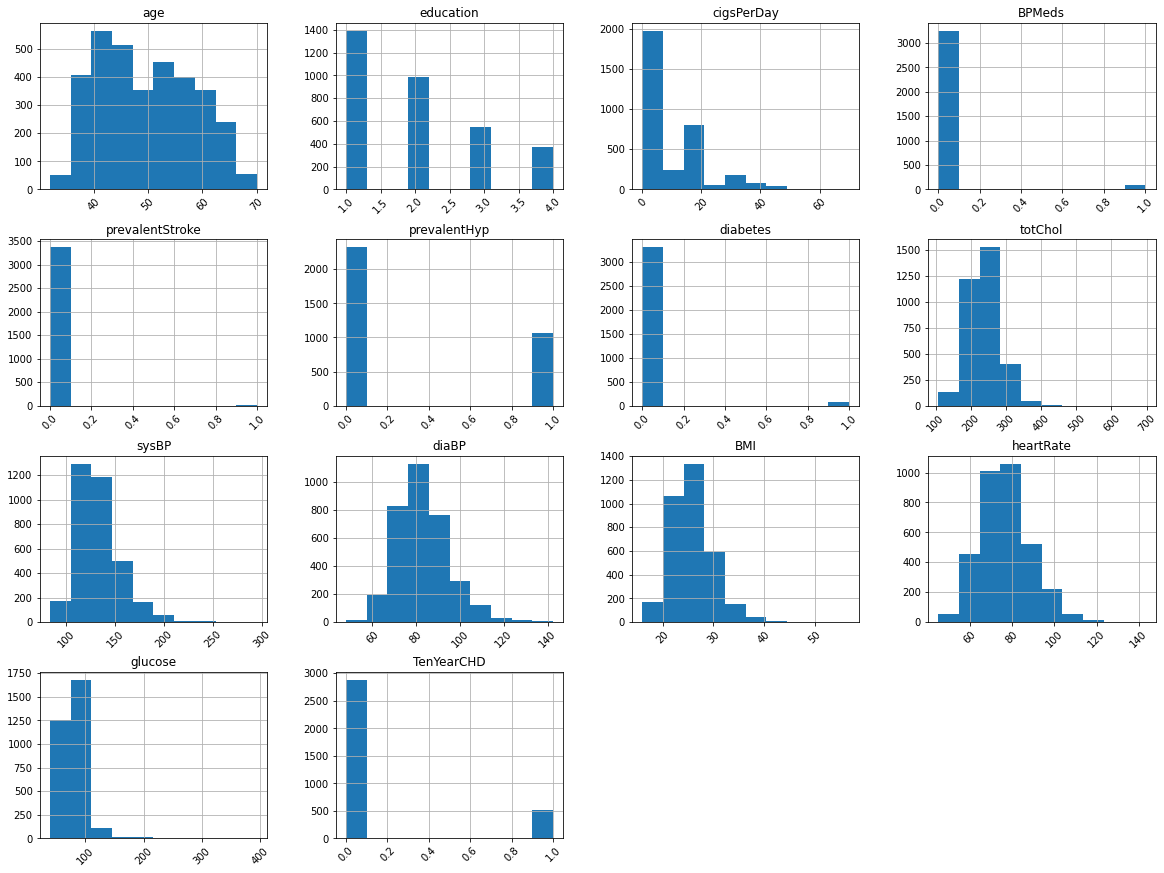

In [15]:
df.iloc[:,1:].hist(figsize=(20,15), xrot=45)
plt.show()

In [16]:
df.columns

Index(['id', 'age', 'education', 'sex', 'is_smoking', 'cigsPerDay', 'BPMeds',
       'prevalentStroke', 'prevalentHyp', 'diabetes', 'totChol', 'sysBP',
       'diaBP', 'BMI', 'heartRate', 'glucose', 'TenYearCHD'],
      dtype='object')

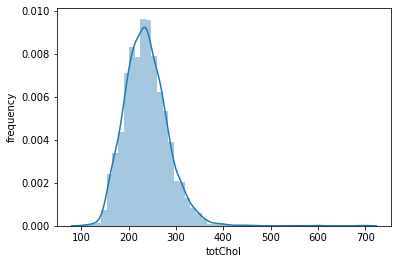

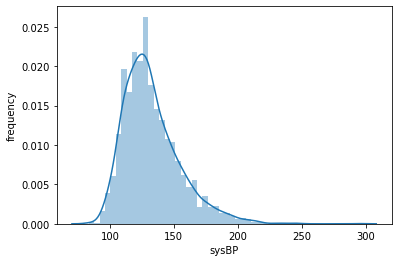

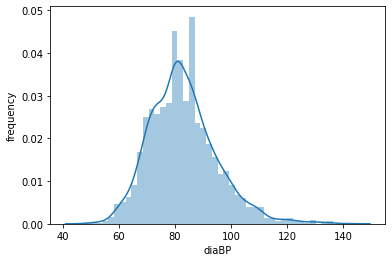

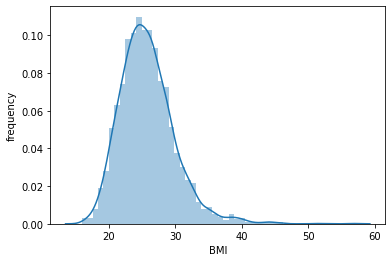

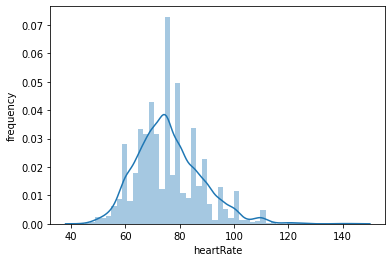

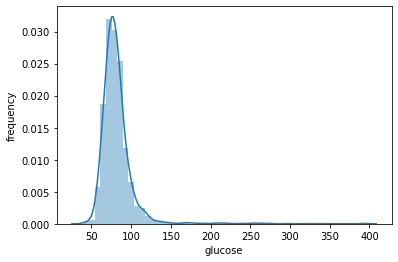

In [17]:
# Visualization of distribution of continuous features
for var in continuous_features:
    fig = sns.distplot(df[var].dropna())
    fig.set_ylabel('frequency')
    fig.set_xlabel(var)

    plt.show()

In [18]:
df['totChol'] = np.log10(df['totChol'])
df['sysBP'] = np.log10(df['sysBP'])
df['diaBP'] = np.log10(df['diaBP'])
df['BMI'] = np.log10(df['BMI'])
df['heartRate'] = np.log10(df['heartRate'])
df['glucose'] = np.log10(df['glucose'])

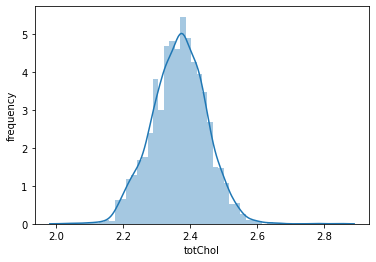

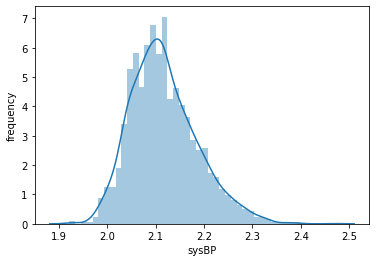

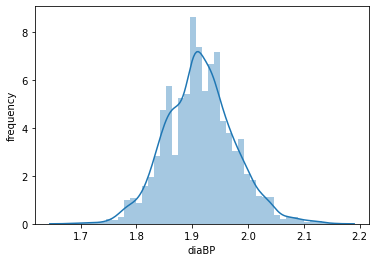

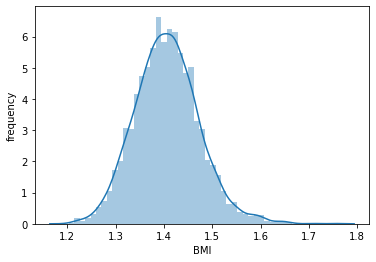

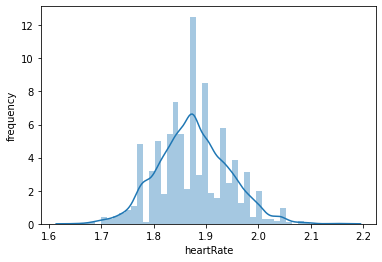

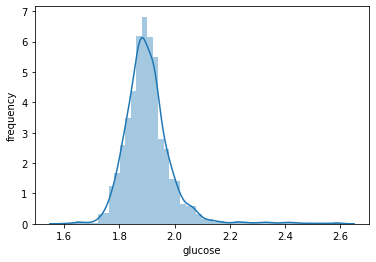

In [19]:
# Visualization of distribution of continuous features
for var in continuous_features:
    fig = sns.distplot(df[var].dropna())
    fig.set_ylabel('frequency')
    fig.set_xlabel(var)

    plt.show()

**Visulalization of categorical features**

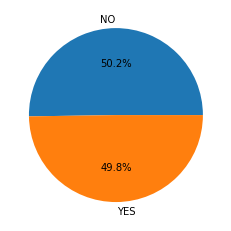

In [20]:
#Creating a pie chart
plt.pie(df['is_smoking'].value_counts(), labels=df['is_smoking'].value_counts().keys(),autopct='%.1f%%')
plt.show()

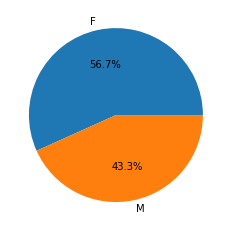

In [21]:
#Creating a pie chart
plt.pie(df['sex'].value_counts(), labels=df['sex'].value_counts().keys(),autopct='%.1f%%')
plt.show()

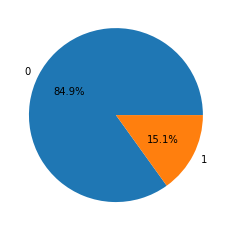

In [22]:
#Creating a pie chart
plt.pie(df['TenYearCHD'].value_counts(), labels=df['TenYearCHD'].value_counts().keys(),autopct='%.1f%%')
plt.show()

**Relation between numeric features and dependent variable**

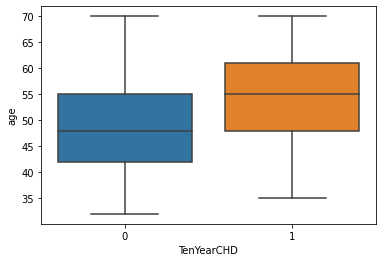

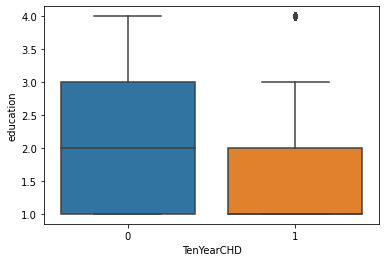

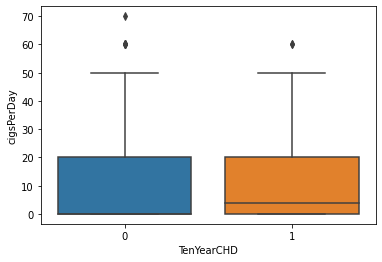

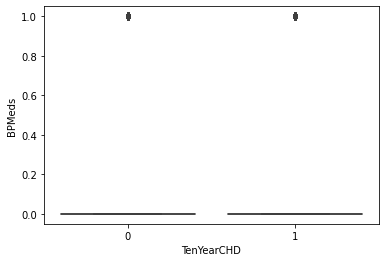

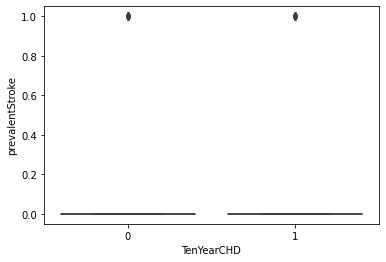

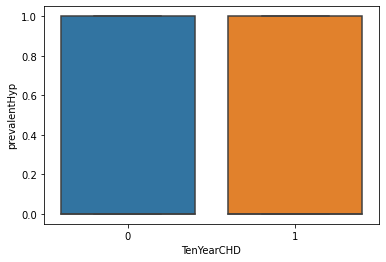

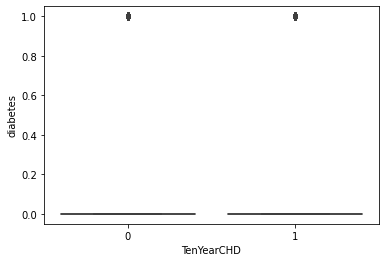

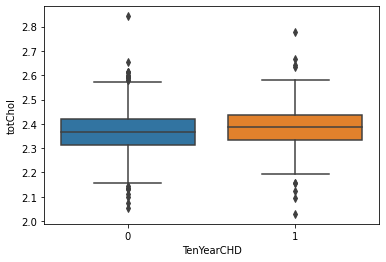

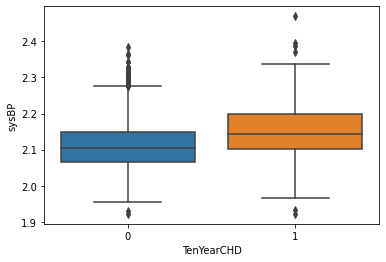

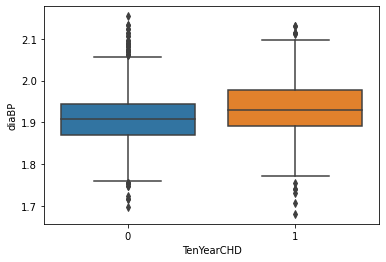

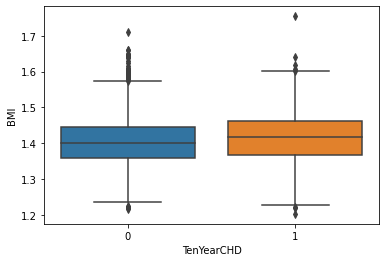

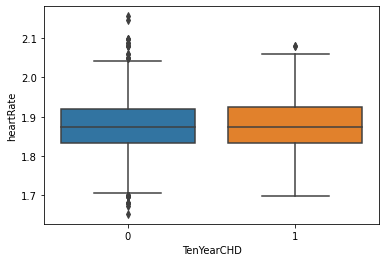

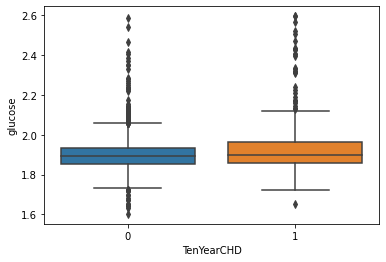

In [23]:
num_cols = [i for i in numeric_features if i not in ['TenYearCHD']]
for col in num_cols:
    sns.boxplot(y = col, x = df['TenYearCHD'].astype('category'), data=df)
    plt.show()

**Relationship between categorical features and dependent variable**

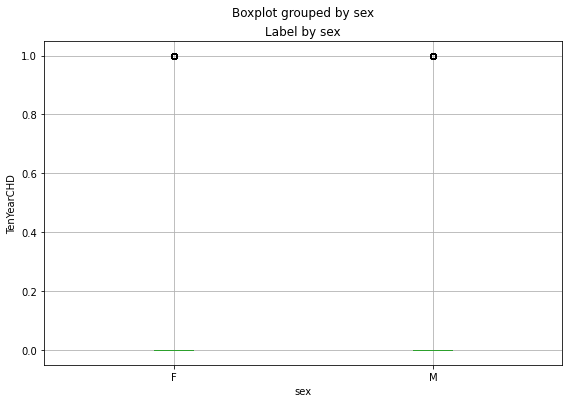

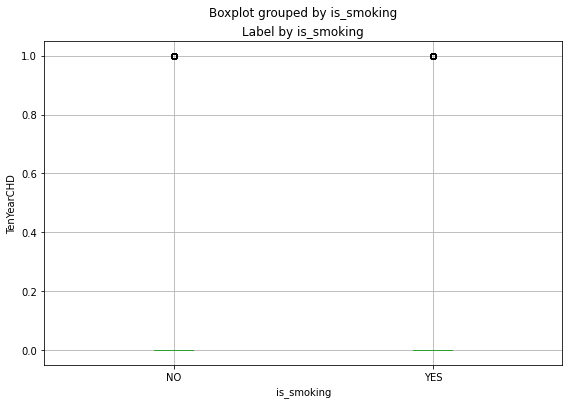

In [24]:
# Box plot of categorical features with respect to dependent variable
for col in categorical_features:
    fig = plt.figure(figsize=(9, 6))
    ax = fig.gca()
    df.boxplot(column = 'TenYearCHD', by = col, ax = ax)
    ax.set_title('Label by ' + col)
    ax.set_ylabel("TenYearCHD")
plt.show()

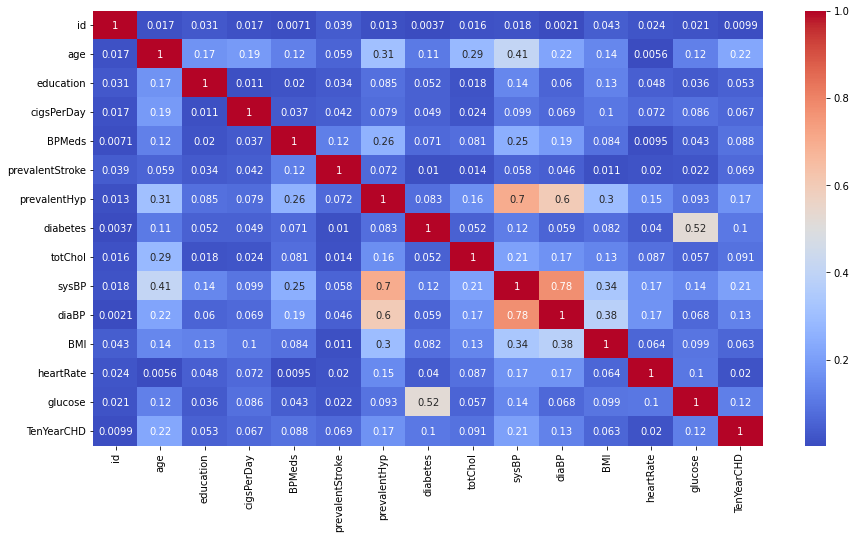

In [25]:
## Correlation matrix
plt.figure(figsize=(15,8))
correlation = df.corr()
sns.heatmap(abs(correlation), annot=True, cmap='coolwarm')
plt.show()

In [26]:
# Converting categorical features to numeric 
#label encoding
encoders_nums = {"sex":{"M":1,"F":0} ,"is_smoking":{"YES":1,"NO":0}}
df= df.replace(encoders_nums)

In [27]:
df.columns

Index(['id', 'age', 'education', 'sex', 'is_smoking', 'cigsPerDay', 'BPMeds',
       'prevalentStroke', 'prevalentHyp', 'diabetes', 'totChol', 'sysBP',
       'diaBP', 'BMI', 'heartRate', 'glucose', 'TenYearCHD'],
      dtype='object')

In [28]:
df['BP'] = (df['diaBP']+df['sysBP'])/2

In [29]:
df1 = df[['age', 'cigsPerDay', 'BPMeds','sex',
          'prevalentHyp','prevalentStroke', 'diabetes',
          'BP', 'totChol','BMI', 'heartRate', 'glucose','TenYearCHD']]

In [30]:
df1.head()

,age,cigsPerDay,BPMeds,sex,prevalentHyp,prevalentStroke,diabetes,BP,totChol,BMI,heartRate,glucose,TenYearCHD
0,64,3.0,0.0,0,0,0,0,2.049840,2.344392,NaN,1.954243,1.903090,1
1,36,0.0,0.0,1,1,0,0,2.108268,2.326336,1.473779,1.857332,1.875061,0
2,46,10.0,0.0,0,0,0,0,1.957858,2.397940,1.308564,1.944483,1.973128,0
3,50,20.0,0.0,1,1,0,0,2.071570,2.367356,1.451172,1.832509,1.973128,1
4,64,30.0,0.0,0,0,0,0,2.032276,2.382017,1.421933,1.845098,1.886491,0


In [31]:
df.columns

Index(['id', 'age', 'education', 'sex', 'is_smoking', 'cigsPerDay', 'BPMeds',
       'prevalentStroke', 'prevalentHyp', 'diabetes', 'totChol', 'sysBP',
       'diaBP', 'BMI', 'heartRate', 'glucose', 'TenYearCHD', 'BP'],
      dtype='object')

In [32]:
df1.isnull().sum()

age                  0
cigsPerDay          22
BPMeds              44
sex                  0
prevalentHyp         0
prevalentStroke      0
diabetes             0
BP                   0
totChol             38
BMI                 14
heartRate            1
glucose            304
TenYearCHD           0
dtype: int64

In [33]:
# defining imputer
imputer = KNNImputer(n_neighbors=1)
df2 = pd.DataFrame(imputer.fit_transform(df1.values))

In [34]:
df1.head()

,age,cigsPerDay,BPMeds,sex,prevalentHyp,prevalentStroke,diabetes,BP,totChol,BMI,heartRate,glucose,TenYearCHD
0,64,3.0,0.0,0,0,0,0,2.049840,2.344392,NaN,1.954243,1.903090,1
1,36,0.0,0.0,1,1,0,0,2.108268,2.326336,1.473779,1.857332,1.875061,0
2,46,10.0,0.0,0,0,0,0,1.957858,2.397940,1.308564,1.944483,1.973128,0
3,50,20.0,0.0,1,1,0,0,2.071570,2.367356,1.451172,1.832509,1.973128,1
4,64,30.0,0.0,0,0,0,0,2.032276,2.382017,1.421933,1.845098,1.886491,0


In [35]:
df2.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,64.0,3.0,0.0,0.0,0.0,0.0,0.0,2.049840,2.344392,1.401917,1.954243,1.903090,1.0
1,36.0,0.0,0.0,1.0,1.0,0.0,0.0,2.108268,2.326336,1.473779,1.857332,1.875061,0.0
2,46.0,10.0,0.0,0.0,0.0,0.0,0.0,1.957858,2.397940,1.308564,1.944483,1.973128,0.0
3,50.0,20.0,0.0,1.0,1.0,0.0,0.0,2.071570,2.367356,1.451172,1.832509,1.973128,1.0
4,64.0,30.0,0.0,0.0,0.0,0.0,0.0,2.032276,2.382017,1.421933,1.845098,1.886491,0.0


In [36]:
df2 = df2.rename({0: 'age', 1: 'cigsPerDay',2: 'BPMeds', 3: 'sex',
                  4: 'prevalentHyp', 5: 'prevalentStroke',6: 'diabetes',
                  7: 'BP',8: 'totChol', 9: 'BMI', 10: 'heartRate', 11: 'glucose', 12: 'TenYearCHD'}, axis=1)

In [37]:
df.columns

Index(['id', 'age', 'education', 'sex', 'is_smoking', 'cigsPerDay', 'BPMeds',
       'prevalentStroke', 'prevalentHyp', 'diabetes', 'totChol', 'sysBP',
       'diaBP', 'BMI', 'heartRate', 'glucose', 'TenYearCHD', 'BP'],
      dtype='object')

In [38]:
df1.head()

,age,cigsPerDay,BPMeds,sex,prevalentHyp,prevalentStroke,diabetes,BP,totChol,BMI,heartRate,glucose,TenYearCHD
0,64,3.0,0.0,0,0,0,0,2.049840,2.344392,NaN,1.954243,1.903090,1
1,36,0.0,0.0,1,1,0,0,2.108268,2.326336,1.473779,1.857332,1.875061,0
2,46,10.0,0.0,0,0,0,0,1.957858,2.397940,1.308564,1.944483,1.973128,0
3,50,20.0,0.0,1,1,0,0,2.071570,2.367356,1.451172,1.832509,1.973128,1
4,64,30.0,0.0,0,0,0,0,2.032276,2.382017,1.421933,1.845098,1.886491,0


In [39]:
df2.head()

,age,cigsPerDay,BPMeds,sex,prevalentHyp,prevalentStroke,diabetes,BP,totChol,BMI,heartRate,glucose,TenYearCHD
0,64.0,3.0,0.0,0.0,0.0,0.0,0.0,2.049840,2.344392,1.401917,1.954243,1.903090,1.0
1,36.0,0.0,0.0,1.0,1.0,0.0,0.0,2.108268,2.326336,1.473779,1.857332,1.875061,0.0
2,46.0,10.0,0.0,0.0,0.0,0.0,0.0,1.957858,2.397940,1.308564,1.944483,1.973128,0.0
3,50.0,20.0,0.0,1.0,1.0,0.0,0.0,2.071570,2.367356,1.451172,1.832509,1.973128,1.0
4,64.0,30.0,0.0,0.0,0.0,0.0,0.0,2.032276,2.382017,1.421933,1.845098,1.886491,0.0


In [40]:
X = df2.iloc[:,:12].apply(zscore)

In [41]:
y = df2['TenYearCHD'].values

In [42]:
X

,age,cigsPerDay,BPMeds,sex,prevalentHyp,prevalentStroke,diabetes,BP,totChol,BMI,heartRate,glucose
0,1.682783,-0.511146,-0.175238,-0.873425,-0.678658,-0.080821,-0.162295,0.557934,-0.282532,-0.066369,1.173975,0.010023
1,-1.576210,-0.764033,-0.175238,1.144919,1.473495,-0.080821,-0.162295,1.506198,-0.504447,1.011078,-0.270234,-0.307927
2,-0.412284,0.078925,-0.175238,-0.873425,-0.678658,-0.080821,-0.162295,-0.934918,0.375576,-1.466041,1.028528,0.804513
3,0.053287,0.921883,-0.175238,1.144919,1.473495,-0.080821,-0.162295,0.910600,-0.000306,0.672128,-0.640169,0.804513
4,1.682783,1.764841,-0.175238,-0.873425,-0.678658,-0.080821,-0.162295,0.272865,0.179881,0.233732,-0.452559,-0.178275
...,...,...,...,...,...,...,...,...,...,...,...,...
3385,1.217213,-0.764033,-0.175238,-0.873425,-0.678658,-0.080821,-0.162295,-0.337842,0.605407,0.903009,-0.452559,1.254964
3386,-0.412284,-0.764033,-0.175238,-0.873425,-0.678658,-0.080821,-0.162295,-2.224604,-0.842213,-0.970242,0.411671,0.250388
3387,-0.645069,-0.511146,-0.175238,1.144919,1.473495,-0.080821,-0.162295,2.105528,2.201918,0.822453,-0.180962,-0.509037
3388,1.217213,-0.764033,-0.175238,1.144919,1.473495,-0.080821,-0.162295,1.728306,-1.061219,-0.666113,0.411671,0.308691


In [43]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.20, random_state=1)

# Logistic Regression

In [44]:
lr_clf = LogisticRegression(class_weight='balanced',verbose = 10)
lr_clf.fit(X_train, y_train)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished


LogisticRegression(class_weight='balanced', verbose=10)

In [45]:
# Get the predicted probabilities
lr_train_preds = lr_clf.predict_proba(X_train)[:,1]
lr_test_preds = lr_clf.predict_proba(X_test)[:,1]

In [46]:
lr_train_preds

array([0.56459417, 0.6229123 , 0.81271745, ..., 0.40265863, 0.23620604,
       0.47153888])

In [47]:
# Get the predicted classes
lr_train_class_preds = np.where(lr_clf.predict_proba(X_train)[:,1] > 0.5, 1, 0)
lr_test_class_preds = np.where(lr_clf.predict_proba(X_test)[:,1] > 0.5, 1, 0)

In [48]:
lr_train_class_preds

array([1, 1, 1, ..., 0, 0, 0])

In [49]:
# Train matrics
LR_train_Accuracy_Score = accuracy_score(y_train,lr_train_class_preds)
LR_train_Precision_Score = precision_score(y_train,lr_train_class_preds)
LR_train_Recall_Score = recall_score(y_train,lr_train_class_preds)
LR_train_F1_Score = f1_score(y_train,lr_train_class_preds)
LR_train_roc_auc = roc_auc_score(y_train,lr_train_preds)

In [50]:
# Test matrics
LR_test_Accuracy_Score = accuracy_score(y_test,lr_test_class_preds)
LR_test_Precision_Score = precision_score(y_test,lr_test_class_preds)
LR_test_Recall_Score = recall_score(y_test,lr_test_class_preds)
LR_test_F1_Score = f1_score(y_test,lr_test_class_preds)
LR_test_roc_auc = roc_auc_score(y_test,lr_test_preds)

In [51]:
LR_df=pd.DataFrame({'train_accuracy':LR_train_Accuracy_Score,'test_accuracy':LR_test_Accuracy_Score,
                      'train_precision':LR_train_Precision_Score,'test_precision':LR_test_Precision_Score,
                      'train_recall':LR_train_Recall_Score,'test_recall':LR_test_Recall_Score,
                      'train_f1score':LR_train_F1_Score,'test_f1score':LR_test_F1_Score,
                      'train_auc_roc':LR_train_roc_auc,'test_auc_roc':LR_test_roc_auc},index=['Logistic Regression'])

In [52]:
LR_df

,train_accuracy,test_accuracy,train_precision,test_precision,train_recall,test_recall,train_f1score,test_f1score,train_auc_roc,test_auc_roc
Logistic Regression,0.660398,0.660767,0.262862,0.254613,0.678744,0.71134,0.378962,0.375,0.723078,0.7557


              precision    recall  f1-score   support

         0.0       0.93      0.65      0.77       581
         1.0       0.25      0.71      0.38        97

    accuracy                           0.66       678
   macro avg       0.59      0.68      0.57       678
weighted avg       0.83      0.66      0.71       678



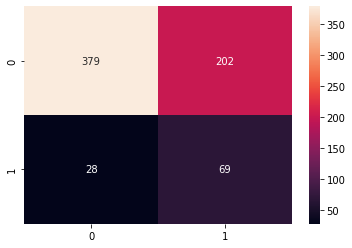

In [53]:
print (classification_report(y_test, lr_test_class_preds))

sns.heatmap(confusion_matrix(y_test, lr_test_class_preds), annot=True, fmt='d')
plt.show()

# Logistic Regression GridSearchCV

In [54]:
lr_cv_clf = LogisticRegression(class_weight='balanced')

In [55]:
# Defining parameter list to perform GridSearchCV
param_dict = {'penalty': ['l2'], 'C': [0.001,0.01,0.1,1,10,100,1000]}
# GridSearchCV
lr_grid = GridSearchCV(estimator=lr_cv_clf,param_grid = param_dict,scoring = 'recall', cv=5)
lr_grid.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=LogisticRegression(class_weight='balanced'),
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],
                         'penalty': ['l2']},
             scoring='recall')

In [56]:
# Getting best estimator from GridSearch
lr_grid.best_estimator_

LogisticRegression(C=1, class_weight='balanced')

In [57]:
# Get the predicted probabilities
lr_cv_train_preds = lr_grid.predict_proba(X_train)[:,1]
lr_cv_test_preds = lr_grid.predict_proba(X_test)[:,1]

In [58]:
lr_cv_train_preds

array([0.56459417, 0.6229123 , 0.81271745, ..., 0.40265863, 0.23620604,
       0.47153888])

In [59]:
# Get the predicted classes
lr_cv_train_class_preds = np.where(lr_grid.predict_proba(X_train)[:,1] > 0.50, 1, 0)
lr_cv_test_class_preds = np.where(lr_grid.predict_proba(X_test)[:,1] > 0.50, 1, 0)

In [60]:
lr_cv_train_class_preds

array([1, 1, 1, ..., 0, 0, 0])

In [61]:
# Train matrics
LR_cv_train_Accuracy_Score = accuracy_score(y_train,lr_cv_train_class_preds)
LR_cv_train_Precision_Score = precision_score(y_train,lr_cv_train_class_preds)
LR_cv_train_Recall_Score = recall_score(y_train,lr_cv_train_class_preds)
LR_cv_train_F1_Score = f1_score(y_train,lr_cv_train_class_preds)
LR_cv_train_roc_auc = roc_auc_score(y_train,lr_cv_train_preds)

In [62]:
# Test matrics
LR_cv_test_Accuracy_Score = accuracy_score(y_test,lr_cv_test_class_preds)
LR_cv_test_Precision_Score = precision_score(y_test,lr_cv_test_class_preds)
LR_cv_test_Recall_Score = recall_score(y_test,lr_cv_test_class_preds)
LR_cv_test_F1_Score = f1_score(y_test,lr_cv_test_class_preds)
LR_cv_test_roc_auc = roc_auc_score(y_test,lr_cv_test_preds)

In [63]:
LR_cv_df=pd.DataFrame({'train_accuracy':LR_cv_train_Accuracy_Score,'test_accuracy':LR_cv_test_Accuracy_Score,
                      'train_precision':LR_cv_train_Precision_Score,'test_precision':LR_cv_test_Precision_Score,
                      'train_recall':LR_cv_train_Recall_Score,'test_recall':LR_cv_test_Recall_Score,
                      'train_f1score':LR_cv_train_F1_Score,'test_f1score':LR_cv_test_F1_Score,
                      'train_auc_roc':LR_cv_train_roc_auc,'test_auc_roc':LR_cv_test_roc_auc},index=['Logistic Regression GridSearchCV'])

In [64]:
LR_cv_df

,train_accuracy,test_accuracy,train_precision,test_precision,train_recall,test_recall,train_f1score,test_f1score,train_auc_roc,test_auc_roc
Logistic Regression GridSearchCV,0.660398,0.660767,0.262862,0.254613,0.678744,0.71134,0.378962,0.375,0.723078,0.7557


              precision    recall  f1-score   support

         0.0       0.93      0.65      0.77       581
         1.0       0.25      0.71      0.38        97

    accuracy                           0.66       678
   macro avg       0.59      0.68      0.57       678
weighted avg       0.83      0.66      0.71       678



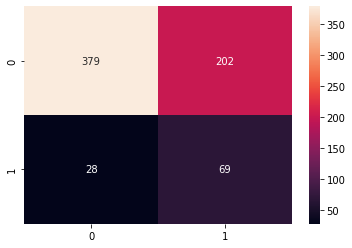

In [65]:
print (classification_report(y_test, lr_cv_test_class_preds))

sns.heatmap(confusion_matrix(y_test, lr_cv_test_class_preds), annot=True, fmt='d')
plt.show()

# Decision Tree

In [66]:
dt_clf = DecisionTreeClassifier(max_depth = 4,class_weight='balanced')
dt_clf.fit(X_train, y_train)

DecisionTreeClassifier(class_weight='balanced', max_depth=4)

In [67]:
# Get the predicted classes
dt_train_preds = dt_clf.predict(X_train)
dt_test_preds = dt_clf.predict(X_test)

In [68]:
# Train matrics
dt_train_Accuracy_Score = accuracy_score(y_train,dt_train_preds)
dt_train_Precision_Score = precision_score(y_train,dt_train_preds)
dt_train_Recall_Score = recall_score(y_train,dt_train_preds)
dt_train_F1_Score = f1_score(y_train,dt_train_preds)
dt_train_roc_auc = roc_auc_score(y_train,dt_train_preds)

In [69]:
# Test matrics
dt_test_Accuracy_Score = accuracy_score(y_test,dt_test_preds)
dt_test_Precision_Score = precision_score(y_test,dt_test_preds)
dt_test_Recall_Score = recall_score(y_test,dt_test_preds)
dt_test_F1_Score = f1_score(y_test,dt_test_preds)
dt_test_roc_auc = roc_auc_score(y_test,dt_test_preds)

In [70]:
dt_df=pd.DataFrame({'train_accuracy':dt_train_Accuracy_Score,'test_accuracy':dt_test_Accuracy_Score,
                      'train_precision':dt_train_Precision_Score,'test_precision':dt_test_Precision_Score,
                      'train_recall':dt_train_Recall_Score,'test_recall':dt_test_Recall_Score,
                      'train_f1score':dt_train_F1_Score,'test_f1score':dt_test_F1_Score,
                      'train_auc_roc':dt_train_roc_auc,'test_auc_roc':dt_test_roc_auc},index=['Decision Tree'])

In [71]:
dt_df

,train_accuracy,test_accuracy,train_precision,test_precision,train_recall,test_recall,train_f1score,test_f1score,train_auc_roc,test_auc_roc
Decision Tree,0.597714,0.600295,0.247952,0.229814,0.804348,0.762887,0.379055,0.353222,0.682418,0.668018


              precision    recall  f1-score   support

         0.0       0.94      0.57      0.71       581
         1.0       0.23      0.76      0.35        97

    accuracy                           0.60       678
   macro avg       0.58      0.67      0.53       678
weighted avg       0.83      0.60      0.66       678



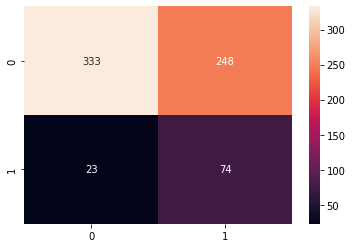

In [72]:
print (classification_report(y_test, dt_test_preds))

sns.heatmap(confusion_matrix(y_test, dt_test_preds), annot=True, fmt='d')
plt.show()

# Decision tree gridSearchCV

In [73]:
dt_cv_clf = DecisionTreeClassifier(random_state = 20,class_weight='balanced')

In [74]:
# Defining parameter list to perform GridSearchCV
param_dict = {'ccp_alpha': [0.1, 0.01, 0.001],
              'criterion': ['gini', 'entropy'],
              'max_depth': [5, 6, 7, 8, 9],
              'max_features': ['auto', 'sqrt', 'log2']}
# GridSearchCV
dt_grid = GridSearchCV(estimator=dt_cv_clf,param_grid = param_dict, cv=5)
dt_grid.fit(X_train,y_train)

GridSearchCV(cv=5,
             estimator=DecisionTreeClassifier(class_weight='balanced',
                                              random_state=20),
             param_grid={'ccp_alpha': [0.1, 0.01, 0.001],
                         'criterion': ['gini', 'entropy'],
                         'max_depth': [5, 6, 7, 8, 9],
                         'max_features': ['auto', 'sqrt', 'log2']})

In [75]:
# Getting best estimator from GridSearch
dt_grid.best_estimator_

DecisionTreeClassifier(ccp_alpha=0.001, class_weight='balanced',
                       criterion='entropy', max_depth=5, max_features='auto',
                       random_state=20)

In [76]:
# Get the predicted classes
dt_cv_train_preds = dt_grid.predict(X_train)
dt_cv_test_preds = dt_grid.predict(X_test)

In [77]:
# Train matrics
dt_cv_train_Accuracy_Score = accuracy_score(y_train,dt_cv_train_preds)
dt_cv_train_Precision_Score = precision_score(y_train,dt_cv_train_preds)
dt_cv_train_Recall_Score = recall_score(y_train,dt_cv_train_preds)
dt_cv_train_F1_Score = f1_score(y_train,dt_cv_train_preds)
dt_cv_train_roc_auc = roc_auc_score(y_train,dt_cv_train_preds)

In [78]:
# Test matrics
dt_cv_test_Accuracy_Score = accuracy_score(y_test,dt_cv_test_preds)
dt_cv_test_Precision_Score = precision_score(y_test,dt_cv_test_preds)
dt_cv_test_Recall_Score = recall_score(y_test,dt_cv_test_preds)
dt_cv_test_F1_Score = f1_score(y_test,dt_cv_test_preds)
dt_cv_test_roc_auc = roc_auc_score(y_test,dt_cv_test_preds)

In [79]:
dt_cv_df=pd.DataFrame({'train_accuracy':dt_cv_train_Accuracy_Score,'test_accuracy':dt_cv_test_Accuracy_Score,
                      'train_precision':dt_cv_train_Precision_Score,'test_precision':dt_cv_test_Precision_Score,
                      'train_recall':dt_cv_train_Recall_Score,'test_recall':dt_cv_test_Recall_Score,
                      'train_f1score':dt_cv_train_F1_Score,'test_f1score':dt_cv_test_F1_Score,
                      'train_auc_roc':dt_cv_train_roc_auc,'test_auc_roc':dt_cv_test_roc_auc},index=['Decision Tree GridSearchCV'])

In [80]:
dt_cv_df

,train_accuracy,test_accuracy,train_precision,test_precision,train_recall,test_recall,train_f1score,test_f1score,train_auc_roc,test_auc_roc
Decision Tree GridSearchCV,0.699484,0.684366,0.280394,0.253165,0.618357,0.618557,0.385833,0.359281,0.666228,0.656955


              precision    recall  f1-score   support

         0.0       0.92      0.70      0.79       581
         1.0       0.25      0.62      0.36        97

    accuracy                           0.68       678
   macro avg       0.58      0.66      0.57       678
weighted avg       0.82      0.68      0.73       678



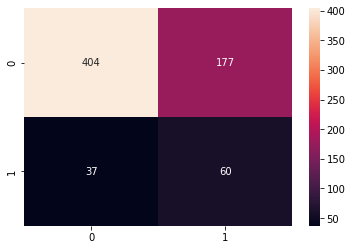

In [81]:
print (classification_report(y_test, dt_cv_test_preds))

sns.heatmap(confusion_matrix(y_test, dt_cv_test_preds), annot=True, fmt='d')
plt.show()

# Random Forest

In [82]:
rf_cv_clf = RandomForestClassifier(random_state = 20,class_weight='balanced')

In [83]:
# Defining parameter list to perform GridSearchCV
param_dict = {'n_estimators': [200,300,400],
              'max_features': ['auto', 'sqrt', 'log2'],
              'max_depth' : [4,5,6,7,8],
              'criterion' :['gini', 'entropy']}
# GridSearchCV
rf_grid = GridSearchCV(estimator=rf_cv_clf,param_grid = param_dict,scoring = 'recall', cv=5)
rf_grid.fit(X_train,y_train)

GridSearchCV(cv=5,
             estimator=RandomForestClassifier(class_weight='balanced',
                                              random_state=20),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [4, 5, 6, 7, 8],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'n_estimators': [200, 300, 400]},
             scoring='recall')

In [84]:
# Getting best estimator from GridSearch
rf_grid.best_estimator_

RandomForestClassifier(class_weight='balanced', criterion='entropy',
                       max_depth=4, n_estimators=400, random_state=20)

In [85]:
# Get the predicted classes
rf_cv_train_preds = rf_grid.predict(X_train)
rf_cv_test_preds = rf_grid.predict(X_test)

In [86]:
# Train matrics
rf_cv_train_Accuracy_Score = accuracy_score(y_train,rf_cv_train_preds)
rf_cv_train_Precision_Score = precision_score(y_train,rf_cv_train_preds)
rf_cv_train_Recall_Score = recall_score(y_train,rf_cv_train_preds)
rf_cv_train_F1_Score = f1_score(y_train,rf_cv_train_preds)
rf_cv_train_roc_auc = roc_auc_score(y_train,rf_cv_train_preds)

In [87]:
# Test matrics
rf_cv_test_Accuracy_Score = accuracy_score(y_test,rf_cv_test_preds)
rf_cv_test_Precision_Score = precision_score(y_test,rf_cv_test_preds)
rf_cv_test_Recall_Score = recall_score(y_test,rf_cv_test_preds)
rf_cv_test_F1_Score = f1_score(y_test,rf_cv_test_preds)
rf_cv_test_roc_auc = roc_auc_score(y_test,rf_cv_test_preds)

In [88]:
rf_cv_df=pd.DataFrame({'train_accuracy':rf_cv_train_Accuracy_Score,'test_accuracy':rf_cv_test_Accuracy_Score,
                      'train_precision':rf_cv_train_Precision_Score,'test_precision':rf_cv_test_Precision_Score,
                      'train_recall':rf_cv_train_Recall_Score,'test_recall':rf_cv_test_Recall_Score,
                      'train_f1score':rf_cv_train_F1_Score,'test_f1score':rf_cv_test_F1_Score,
                      'train_auc_roc':rf_cv_train_roc_auc,'test_auc_roc':rf_cv_test_roc_auc},index=['RandomForest GridSearchCV'])

In [89]:
rf_cv_df

,train_accuracy,test_accuracy,train_precision,test_precision,train_recall,test_recall,train_f1score,test_f1score,train_auc_roc,test_auc_roc
RandomForest GridSearchCV,0.71792,0.712389,0.305216,0.28125,0.664251,0.649485,0.418251,0.392523,0.69592,0.686188


              precision    recall  f1-score   support

         0.0       0.93      0.72      0.81       581
         1.0       0.28      0.65      0.39        97

    accuracy                           0.71       678
   macro avg       0.60      0.69      0.60       678
weighted avg       0.83      0.71      0.75       678



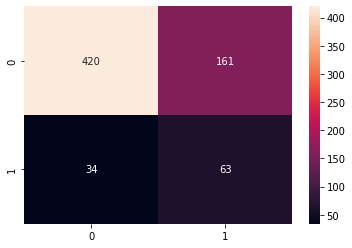

In [90]:
print (classification_report(y_test, rf_cv_test_preds))

sns.heatmap(confusion_matrix(y_test, rf_cv_test_preds), annot=True, fmt='d')
plt.show()

# XGBoost

In [91]:
xgb_cv_clf = xgb.XGBClassifier(random_state=20)

In [92]:
# Defining parameter list to perform GridSearchCV
param_dict = {'gamma': [0.1,0.2,0.4,0.8,1.6, 200],
              'learning_rate': [0.01, 0.03, 0.1, 0.4, 0.5, 0.6],
              'max_depth': [5,6,7,10,11,12],
              'n_estimators': [50,65,100,115,130,150],
}
# GridSearchCV
xgb_grid = GridSearchCV(estimator=xgb_cv_clf,param_grid = param_dict, cv=3)
xgb_grid.fit(X_train,y_train)

GridSearchCV(cv=3, estimator=XGBClassifier(random_state=20),
             param_grid={'gamma': [0.1, 0.2, 0.4, 0.8, 1.6, 200],
                         'learning_rate': [0.01, 0.03, 0.1, 0.4, 0.5, 0.6],
                         'max_depth': [5, 6, 7, 10, 11, 12],
                         'n_estimators': [50, 65, 100, 115, 130, 150]})

In [93]:
# Getting best estimator from GridSearch
xgb_grid.best_estimator_

XGBClassifier(gamma=1.6, max_depth=6, random_state=20)

In [94]:
# Get the predicted classes
xgb_cv_train_preds = xgb_grid.predict(X_train)
xgb_cv_test_preds = xgb_grid.predict(X_test)

In [95]:
# Train matrics
xgb_cv_train_Accuracy_Score = accuracy_score(y_train,xgb_cv_train_preds)
xgb_cv_train_Precision_Score = precision_score(y_train,xgb_cv_train_preds)
xgb_cv_train_Recall_Score = recall_score(y_train,xgb_cv_train_preds)
xgb_cv_train_F1_Score = f1_score(y_train,xgb_cv_train_preds)
xgb_cv_train_roc_auc = roc_auc_score(y_train,xgb_cv_train_preds)

In [96]:
# Test matrics
xgb_cv_test_Accuracy_Score = accuracy_score(y_test,xgb_cv_test_preds)
xgb_cv_test_Precision_Score = precision_score(y_test,xgb_cv_test_preds)
xgb_cv_test_Recall_Score = recall_score(y_test,xgb_cv_test_preds)
xgb_cv_test_F1_Score = f1_score(y_test,xgb_cv_test_preds)
xgb_cv_test_roc_auc = roc_auc_score(y_test,xgb_cv_test_preds)

In [97]:
xgb_cv_df=pd.DataFrame({'train_accuracy':xgb_cv_train_Accuracy_Score,'test_accuracy':xgb_cv_test_Accuracy_Score,
                      'train_precision':xgb_cv_train_Precision_Score,'test_precision':xgb_cv_test_Precision_Score,
                      'train_recall':xgb_cv_train_Recall_Score,'test_recall':xgb_cv_test_Recall_Score,
                      'train_f1score':xgb_cv_train_F1_Score,'test_f1score':xgb_cv_test_F1_Score,
                      'train_auc_roc':xgb_cv_train_roc_auc,'test_auc_roc':xgb_cv_test_roc_auc},index=['XGBoost'])

In [98]:
xgb_cv_df

,train_accuracy,test_accuracy,train_precision,test_precision,train_recall,test_recall,train_f1score,test_f1score,train_auc_roc,test_auc_roc
XGBoost,0.898599,0.855457,1.0,0.470588,0.335749,0.082474,0.502712,0.140351,0.667874,0.533492


              precision    recall  f1-score   support

         0.0       0.87      0.98      0.92       581
         1.0       0.47      0.08      0.14        97

    accuracy                           0.86       678
   macro avg       0.67      0.53      0.53       678
weighted avg       0.81      0.86      0.81       678



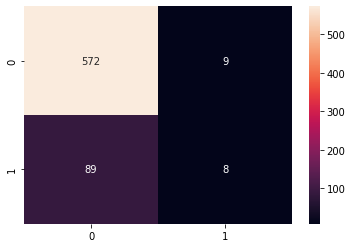

In [99]:
print (classification_report(y_test, xgb_cv_test_preds))

sns.heatmap(confusion_matrix(y_test, xgb_cv_test_preds), annot=True, fmt='d')
plt.show()

In [100]:
#Applying SMOTE

from imblearn.over_sampling import SMOTE

smote = SMOTE(sampling_strategy='not majority')
x_s_res, y_s_res = smote.fit_resample(X_train, y_train)

In [101]:
est_reg = xgb.XGBClassifier(class_weight='balanced', gamma=1.6, learning_rate=0.03,max_depth=5,).fit(x_s_res, y_s_res)
est_pred = est_reg.predict(X_test)
est_pred

array([1., 1., 1., 1., 0., 0., 1., 0., 1., 1., 1., 0., 0., 1., 1., 0., 0.,
       0., 0., 0., 0., 0., 1., 0., 1., 0., 0., 0., 0., 0., 1., 0., 0., 1.,
       1., 0., 0., 0., 0., 0., 0., 1., 1., 0., 1., 1., 0., 0., 0., 1., 0.,
       0., 1., 0., 0., 0., 0., 0., 1., 0., 1., 1., 0., 0., 0., 0., 0., 0.,
       0., 1., 1., 0., 0., 1., 0., 0., 0., 0., 1., 0., 0., 1., 0., 0., 0.,
       0., 1., 1., 1., 0., 0., 0., 1., 0., 0., 0., 1., 0., 0., 1., 0., 0.,
       0., 0., 1., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0.,
       0., 0., 1., 1., 0., 1., 0., 1., 1., 0., 1., 0., 0., 1., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 0., 1., 0., 0., 0.,
       0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.,
       0., 1., 0., 0., 1., 0., 0., 1., 0., 0., 0., 0., 1., 0., 0., 1., 0.,
       0., 0., 0., 1., 0., 0., 0., 1., 1., 0., 0., 0., 0., 0., 1., 1., 0.,
       0., 0., 0., 0., 0.

Accuracy Score : 0.7448377581120944
              precision    recall  f1-score   support

         0.0       0.91      0.77      0.84       581
         1.0       0.30      0.57      0.39        97

    accuracy                           0.74       678
   macro avg       0.61      0.67      0.61       678
weighted avg       0.83      0.74      0.77       678



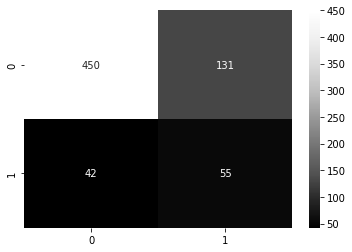

In [102]:
#Metrics Evaluation

print ('Accuracy Score :', accuracy_score(y_test, est_pred))
print (classification_report(y_test, est_pred))

sns.heatmap(confusion_matrix(y_test, est_pred), annot=True, cmap='Greys_r', fmt='d')

# Support vector classifier

In [103]:

# train the model on train set
model = SVC(class_weight='balanced')
model.fit(X_train, y_train)
 
# print prediction results
predictions = model.predict(X_test)
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

         0.0       0.92      0.69      0.79       581
         1.0       0.26      0.66      0.37        97

    accuracy                           0.68       678
   macro avg       0.59      0.67      0.58       678
weighted avg       0.83      0.68      0.73       678



# KNN

In [104]:
knn = KNeighborsClassifier(n_neighbors=5)

In [105]:
# Fit the model
knn.fit(X_train,y_train)

KNeighborsClassifier()

In [106]:
# print prediction results
pred = knn.predict(X_test)
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

         0.0       0.86      0.95      0.91       581
         1.0       0.26      0.10      0.15        97

    accuracy                           0.83       678
   macro avg       0.56      0.53      0.53       678
weighted avg       0.78      0.83      0.80       678

